In [65]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [61]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

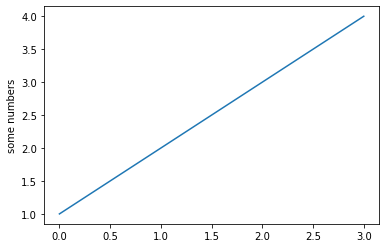

In [66]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [69]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
data = pd.read_csv(r"C:\Users\giant\Downloads\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data=data.dropna()
data.shape

(20433, 10)

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E054813AC8>,
      dtype=object)

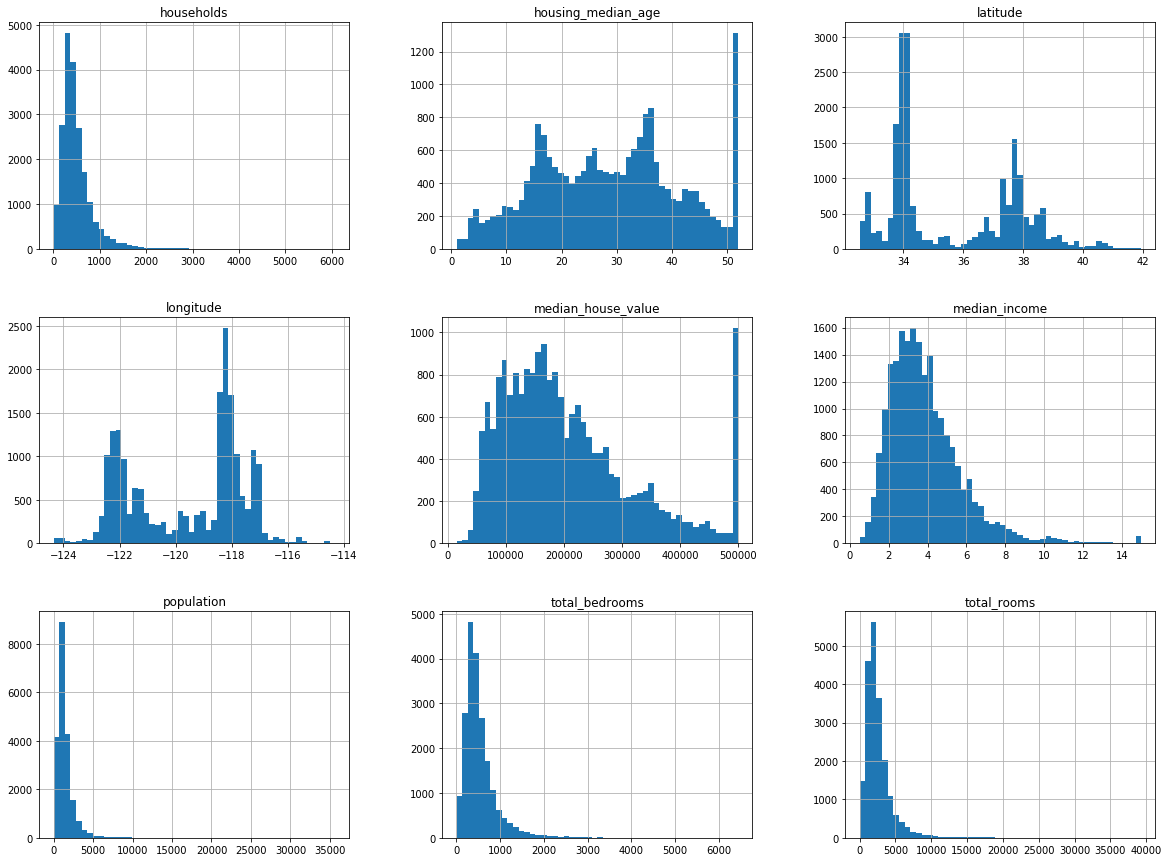

In [5]:
data.hist(bins=50, figsize=(20,15))

In [6]:
data['median_house_value'].value_counts()

500001.0    958
137500.0    119
162500.0    116
112500.0    103
187500.0     92
           ... 
420500.0      1
419000.0      1
443000.0      1
343600.0      1
319500.0      1
Name: median_house_value, Length: 3833, dtype: int64

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [27]:
Xtrain=train.drop(['median_house_value','ocean_proximity'],axis=1)
ytrain=train['median_house_value']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0589FE548>]],
      dtype=object)

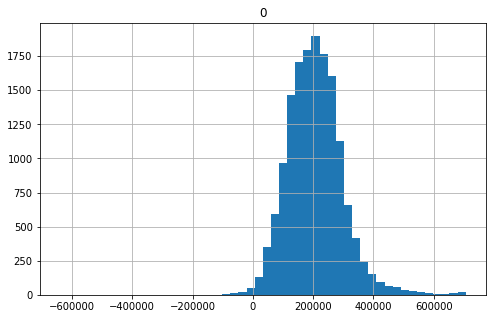

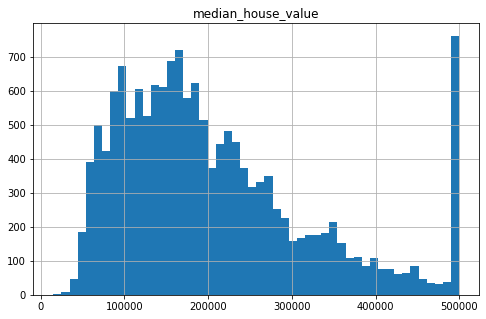

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mod=LinearRegression().fit(Xtrain, ytrain)
pred = mod.predict(Xtrain)
pred=pd.DataFrame(pred)
act=pd.DataFrame(ytrain)
pred.hist(bins=50, figsize=(8,5))
act.hist(bins=50, figsize=(8,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E058BF55C8>]],
      dtype=object)

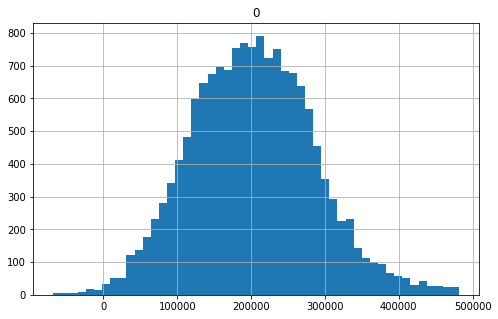

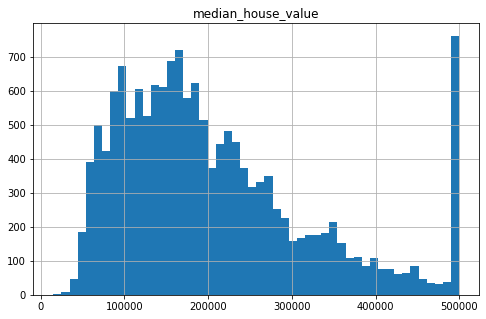

In [57]:
from scipy import stats
pred=pred[(np.abs(stats.zscore(pred)) < 3).all(axis=1)]
pred.hist(bins=50, figsize=(8,5))
act.hist(bins=50, figsize=(8,5))